<center>Заметка 1. Интерактивная работа с графикой</center>
<center>курса <q>Введение в цифровую обработку изображений</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.09</center>

<center>Аннотация</center>
<p>
...
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

<font color='green'>Для начала подгрузим необходимые библиотеки.</font>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

<font color='green'>Запускаем, чтобы можно было интерактивно обрабатывать графику.</font>

In [2]:
cv.startWindowThread()

0

<h2>Базовый функционал</h2>

<h3>Hello world</h3>

<font color='green'> Хотим написать на картинке Hello World. </font>

<font color='green'>Заранее выбираем шрифт и толщину линии. </font>

In [3]:
fontFace = cv.FONT_HERSHEY_DUPLEX#cv.FONT_HERSHEY_SIMPLEX, # cv.FONT_HERSHEY_DUPLEX
thickness = 2

<font color='green'> Создаем чернобелую картинку нужного размера (для opencv это массив numpy).</font>

In [4]:
img = np.zeros( (100, 250) ) #высота 100 пикселей, ширина 250 пикселей
img.shape, img.dtype

((100, 250), dtype('float64'))

0 это черный цвет (отсутвие энергии)

для плавающей точки:
максимум это белый цвет.

<font color='green'>Используем соответствующую функцию для написания текста в конкретном месте на картинке. </font>

In [46]:
cv.putText( img, "Hello world!", org = (40, 50), fontFace = fontFace, fontScale = 1, color = 1 );
# img - картинка, на которой хотим написать текст
# org -- координаты угла прямоугольника текста
# fontFace -- иднетификатор фонта
# fontScale -- маштаб, размер текста
# color -- цвет, итенсивность текста

In [47]:
np.min(img), np.max( img )

(0.0, 1.0)

<font color='green'> Вызываем функцию imshow для показа оуна с нашей картинкой. </font>

<font color='green'> Функция waitKey ждет нажатия любой клавиши для прерывания показа окна, чтобы можно было корректно выходить из программы, а destroyWindow удаляет созданное окно. </font>

In [48]:
cv.imshow( "Window", img )
cv.waitKey(0)
cv.destroyWindow("Window")

In [49]:
cv.putText( img, "Works", org = (60, 80), fontFace = fontFace, fontScale = 0.75, color = 0.5 );

In [50]:
cv.imshow( "Window", img )
cv.waitKey(0)
cv.destroyWindow("Window")

<b>Обработка клавишь</b>

На самом деле waitKey возвращает сканкод нажатой клавиши. <font color='green'> Таким образом мы можем идентифицировать нажатые клавиши.</font>

In [51]:
cv.imshow( "Window", img )
print(cv.waitKey(0))
cv.destroyWindow("Window")

52


In [52]:
# 83 right arrow
# 81 left arrow

<font color='green'> Напишем цикл, который будет в интерактивном окне двигать надпись Hello World по картинке.</font>

<font color='green'> Создаем пустую картинку и создаем окно. Потом с помощью функции waitKey определяем, какая клавиша была нажата, и изменяем координаты надписи в соответствии с нажатой клавишей. Далее перерисовываем картинку (по сути, создаем новую с надписью в новом месте). При нажатии клавиши q мы выходим из цикла, выходим из программы и удаляем созданное окно.</font>

In [56]:
org = np.array((40, 50))

while True:
    cv.imshow( "Window", img )
    k = cv.waitKey(100)
    if k == 54: # 83:# right arrow
        org[0] += 10
    elif k == 52: # 81:# left arrow
        org[0] -= 10
    elif k == 113:
        break
    # print(f'k = {k}, org = {org}')
    if k == 52 or k == 54:
        img = np.zeros( (100,250) )
        print(org)
        cv.putText( img, "Hello world!", org = tuple(org), fontFace = fontFace, fontScale = 1, color = (255, 0, 0))
cv.destroyWindow("Window")

[50 50]
[60 50]
[70 50]
[60 50]
[50 50]
[40 50]
[30 50]
[20 50]


q - выход

<h3>Отображение через matplotlib</h3>

<font color='green'>Попробуем вывести наше изображение через matplotlib </font>

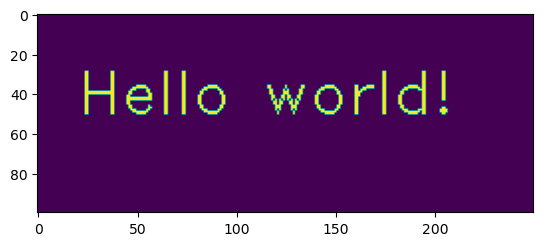

In [57]:
plt.imshow( img );

<font color='green'> Почему картинка цветная? Matplotlib автоматически преобразует картинку в другое цветовое пространство, чтобы объекты были лучше различимы.</font>

<font color='green'> Чтобы отобразить картинку именно в оттенках серого, используем соответствующий флаг. </font>

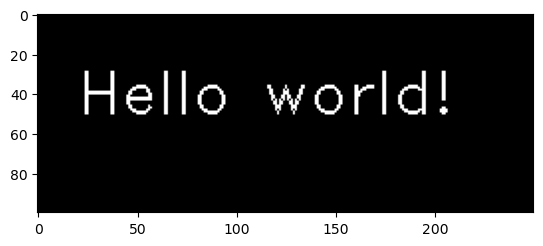

In [58]:
plt.imshow( img, cmap='gray' );

Буква W как-то не идеально отрисована.

<font color='green'> Убедимся, что это действительно оттенки серого.</font>

In [59]:
np.unique( img, return_counts=True )

(array([  0., 255.]), array([24252,   748], dtype=int64))

<font color='green'> С помощью параметра interpolation можно немного сгладить изображение.</font>

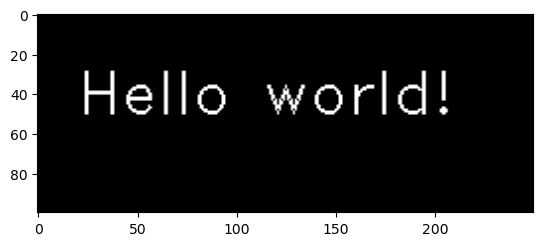

In [60]:
plt.imshow( img, cmap='gray', interpolation= 'bilinear' );
# 'antialiased'
#
# 'nearest'

По умолчанию точка с максимальными значениями становится белой (простейший баланс белого). <font color='green'> Максимальное значение 1, а минимальное 0.


Аргумент vmax позволяет указать явное значение на которое будет нормировано изображений.
Значения выше данного будут урезаны до максимального значения.

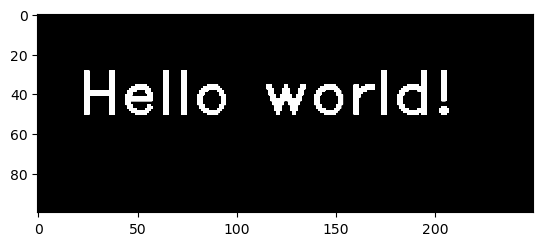

In [61]:
#plt.imshow( img, vmax=0.75, cmap='gray' );
plt.imshow( img, vmax=0.5, cmap='gray' );

<h3>Считывание изображения из файла</h3>

<font color='green'> Загрузим изображение с помощью imread. Изображение цветное, значит, это трехмерный массив, где первые два параметра - высота и ширина, а третий - количество цветовых каналов, то есть 3 (синий, зеленый, красный).</font>

In [5]:
# lena = cv.imread('../data/lena512color.tiff')#[:,:,::-1]
lena = cv.imread('./data/Lenna_(test_image).png')
lena.shape, lena.dtype

((220, 220, 3), dtype('uint8'))

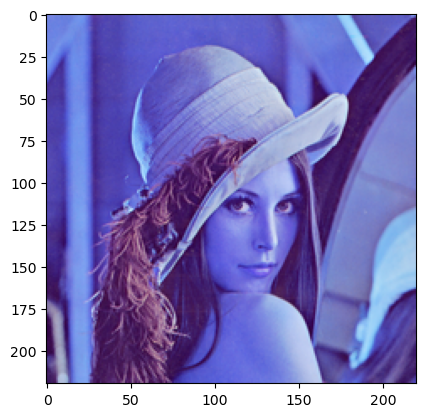

In [6]:
plt.imshow( lena );

<font color='green'> Очевидно, цвета неправильные. Проблема в том, что мы загружаем изображение с помощью библиотеки opencv, а выводим на экран с помощью matplotlib. Opencv ожидает изображение в режиме BGR, а матплотлиб в RGB. Надо восстановить порядок каналов.</font>

Цвета перепутаны.
Каналы расположены в неправильном порядке.

Можно вручную их упорядочить в обратном порядке.

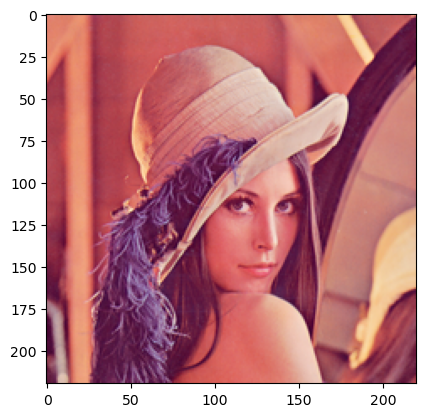

In [7]:
plt.imshow( lena[:,:,::-1] );

Можно воспользоваться функцией из OpenCV.
Предложенная функция имеет богатый набор цветовых пространств.
Она это делает более корректно.

In [8]:
lena_mat = cv.cvtColor(lena, cv.COLOR_BGR2RGB)
lena_mat.shape, lena_mat.dtype

((220, 220, 3), dtype('uint8'))

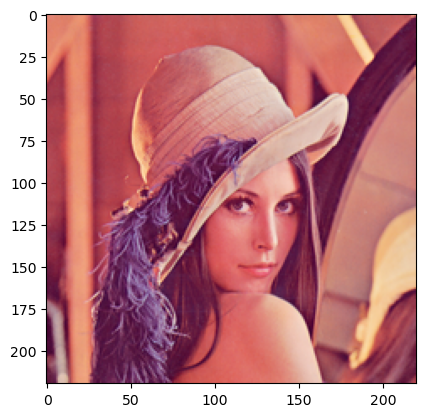

In [9]:
plt.imshow( lena_mat );

<b>Изменим яркость изображения</b>

<font color='green'> Для экспериментов сделаем копию изображения.</font>

In [10]:
img = lena_mat.copy()
img.dtype

dtype('uint8')

<font color='green'> Попробуем увеличить яркость изображения (т.е. увеличим значения пикселей).</font>

In [11]:
img_tmp = img.copy()
img_tmp *= 1.1

UFuncTypeError: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

<font color='green'> Встречаемся с тонкостью, связанную с преобразованием типов. Эту проблему можно решить несколькими способами, например, так:</font>

In [ ]:
img_tmp = img.copy()+0.
img_tmp.dtype

In [ ]:
img_tmp *= 1.1
img_tmp.dtype

In [ ]:
np.max(img_tmp)

<font color='green'> Получили изображение с максимальным значением пикселя 280 Изначальное изображение было 8-битное, это значит, что максимальное значение для него было всего 256, поэтому отобразить его пока что не получится.</font>

In [ ]:
plt.imshow( img_tmp );

In [ ]:
img_tmp.dtype

Нужно нормировать интесивности компонент в пределах от 0 до 1.

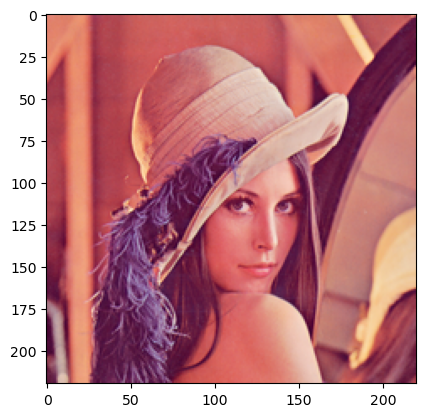

In [12]:
plt.imshow( img_tmp/255 );

<font color='green'> Увеличим еще интенсивность. Не забываем о нормировке. </font>

In [13]:
img_tmp *= 1.3

UFuncTypeError: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

In [ ]:
plt.imshow( img_tmp/255 );

<font color='green'> При увеличении интенсивности, изображение становится все более блеклым, т.е. начинают появляться различные засветы, белые пятна на изображении. Это просиходит потому, что при умножении часть пикселей превосходит порог, и с каждой итерацией все больше пикселей становятся просто белыми.</font>

<b>Ползунок</b>

<font color='green'> Сделаем ползунок в окне с картинкой, чтобы можно было интерактивно менять яркость.</font>

In [14]:
img = lena.copy()

In [15]:
1/20

0.05

In [16]:
10/20

0.5

In [17]:
-10/20

-0.5

<font color='green'> Напишем функцию, которая принимает на вход положение ползунка и меняет яркость отображения в соответствии с положением.</font>

In [18]:
img_tmp = img.copy()+0
def on_trackbar(val):# val ~ 0 до 20 отсчетов, 10 середина
    img_tmp = img.copy()+0.
    k = (val-10)/20
    print(val, k)
    img_tmp *= 1+k

In [19]:
print(id(img_tmp))

1879123708016


In [20]:
on_trackbar(11)

11 0.05


In [21]:
print(id(img_tmp))

1879123708016


Отрисовываем в самой функции.

In [91]:
img_tmp = img.copy()+0
def on_trackbar(val):# val ~ 0 до 20 отсчетов, 10 середина
    img_tmp = img.copy()+0.
    k = (val-10)/20
    print(val, k)
    img_tmp *= 1+k
    cv.imshow( "Image Contrast", img_tmp/255 )

<font color='green'> Создаем ползунок в окне.</font>

In [92]:
cv.namedWindow("Image Contrast")
cv.createTrackbar("Contrast", "Image Contrast", 10, 20,on_trackbar)

10 0.0


In [ ]:
img_tmp = img.copy()+0

In [ ]:
while True:
    k = cv.waitKey(100)
    if k == 113:
        break
cv.destroyWindow("Image Contrast")

11 0.05
6 -0.2
11 0.05
10 0.0
6 -0.2
2 -0.4
7 -0.15
11 0.05
18 0.4


In [ ]:
img_tmp = img.copy()+0
def on_trackbar(val):# val ~ 0 до 20 отсчетов, 10 середина
    global img_tmp
    img_tmp = img.copy()+0.
    k = (val-10)/20
    print(val, k)
    img_tmp *= 1+k

<font color='green'> Чтобы обойтись без глобальных переменных, можно использовать методы ООП.</font>

In [ ]:
cv.namedWindow("Image Contrast")
cv.createTrackbar("Contrast", "Image Contrast", 10, 20,on_trackbar)

10 0.0


In [ ]:
while True:
    cv.imshow( "Image Contrast", img_tmp/255 )
    k = cv.waitKey(100)
    if k == 113:
        break
cv.destroyWindow("Image Contrast")

In [ ]:
class UserData:
    def __call__(self, val):
        self.img_tmp = self.img.copy()+0.
        k = (val-10)/20
        print(val, k)
        self.img_tmp *= 1+k

In [ ]:
user = UserData()
user.img_tmp = img.copy()+0
user.img = img

In [ ]:
user(11)

11 0.05


In [ ]:
cv.namedWindow("Image Contrast")
cv.createTrackbar("Contrast", "Image Contrast", 10, 20, lambda x: user(x) )

10 0.0


In [ ]:
while True:
    cv.imshow( "Image Contrast", user.img_tmp/255 )
    k = cv.waitKey(100)
    if k == 113:
        break
cv.destroyWindow("Image Contrast")

<b>Приведение к 8 битному типу</b>

<font color='green'> Как еще можно привести картинку обратно к 8-битному типу? </font>

In [ ]:
img_tmp = img.copy()+0.
img_tmp *= 1.3

In [ ]:
np.max(img_tmp)

331.5

In [ ]:
img_tmp.dtype

dtype('float64')

Значение больше 255.
перед преобразованием типов нужно "обрезать" значения.

In [ ]:
img_tmp = np.clip(img_tmp, 0, 255)
np.max(img_tmp)

255.0

<font color='green'> Все значения больше 255 становятся равными 255.</font>

In [ ]:
img_tmp = img_tmp.astype('uint8')
img_tmp.dtype

dtype('uint8')

In [ ]:
img_tmp = img.copy()
def on_trackbar(val):
    img_tmp = img.copy()+0.
    k = (val-10)/20
    print(val, k)
    img_tmp *= 1+k
    img_tmp = np.clip(img_tmp, 0, 255)
    img_tmp = img_tmp.astype('uint8')
    cv.imshow( "Image Saturation", img_tmp )

In [ ]:
cv.namedWindow("Image Saturation")
cv.createTrackbar("Saturation", "Image Saturation", 10, 20, on_trackbar)

In [ ]:
img_tmp = img.copy()

In [ ]:
while True:
    k = cv.waitKey(100)
    if k == 113:
        break
cv.destroyWindow("Image Saturation")

<b>Каналы изображения</b>

In [ ]:
lena.shape

(512, 512, 3)

3 указывает на количество каналов.

<font color='green'> Может выделить каналы в отдельную переменную.</font>

In [ ]:
colors = cv.split(lena)
type(colors), len(colors)

(tuple, 3)

In [ ]:
colors[0].shape, colors[0].shape, colors[2].shape

((512, 512), (512, 512), (512, 512))

<font color='green'> Это три цветовые карты нашего изображения. </font>

In [ ]:
colors[0].dtype

dtype('uint8')

<font color='green'> Можем посмотреть каждую цветовую плоскость по отдельности.</font>

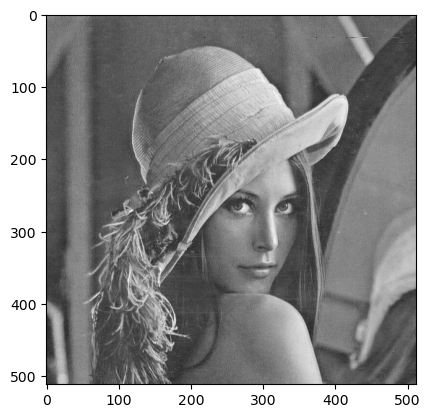

In [ ]:
plt.imshow( colors[0], cmap='gray' )

In [ ]:
colors = colors[::-1]

In [ ]:
img = cv.merge( colors )
img.shape, img.dtype

((512, 512, 3), dtype('uint8'))

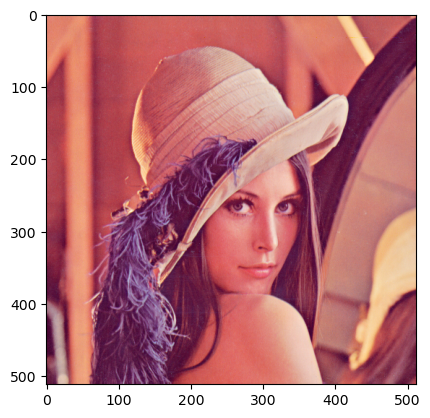

In [ ]:
plt.imshow( img );

<font color='green'> Поменяем цвета в обратном порядке и соединим все карты обратно с помощью функции merge. </font>

In [ ]:
type(colors[0]), colors[0].shape, colors[0].dtype

(numpy.ndarray, (512, 512), dtype('uint8'))

In [ ]:
from copy import deepcopy

In [ ]:
planes = list(deepcopy(colors))

<font color='green'> Можно проверить, какая плоскость за какой цвет отвечает.</font>

In [ ]:
planes[0][:,:] = 255
planes[1][:,:] = 0
planes[2][:,:] = 0

<font color='green'> Закрасили все красным. </font>

In [ ]:
red = cv.merge( planes )

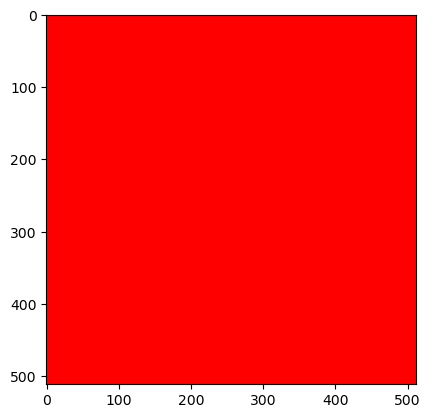

In [ ]:
plt.imshow( red );

<font color='green'>А теперь выведем красную(первую) карту нашего изображения Лены. </font>

In [ ]:
planes[0] = colors[0]

In [ ]:
red = cv.merge( planes )

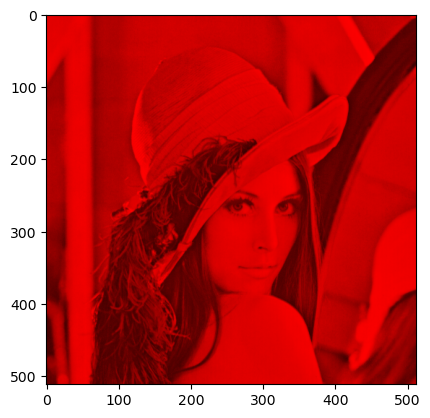

In [ ]:
plt.imshow( red );

In [ ]:
planes[0][:,:] = 0
planes[1][:,:] = colors[1]
green = cv.merge( planes )

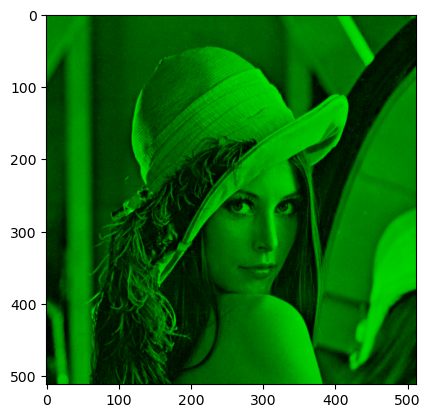

In [ ]:
plt.imshow( green );

<h3>Цветовые преобразования</h3>

<b>Преобразование к серому</b>

Тона серого цвета.
Часто используется в задачах распознования образов.

In [ ]:
lena_gray = cv.cvtColor(lena, cv.COLOR_BGR2GRAY)
lena_gray.shape, lena_gray.dtype

((512, 512), dtype('uint8'))

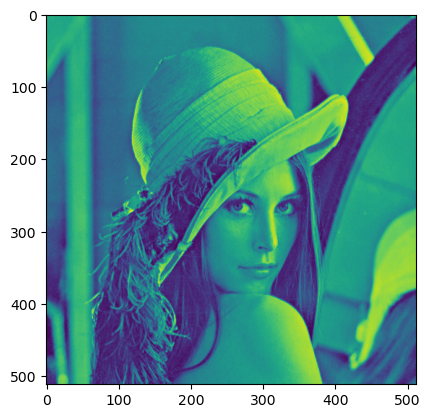

In [ ]:
plt.imshow( lena_gray );

Как и раньше, чтобы matplotlib отображал именно в тонах серого цвета, используем флаг.

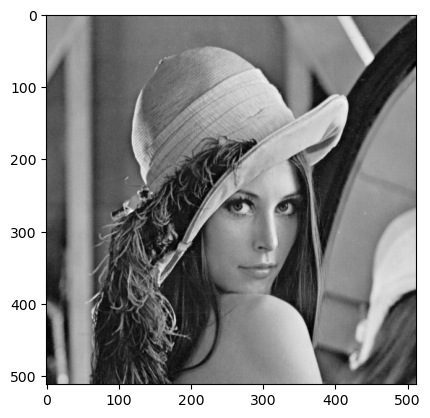

In [ ]:
plt.imshow( lena_gray, cmap='gray' );

Можно сразу при считывании преобразовать в серый цвет.

In [ ]:
lena_gray2 = cv.imread('../data/lena512color.tiff', cv.IMREAD_GRAYSCALE)
lena_gray2.shape, lena_gray2.dtype

((512, 512), dtype('uint8'))

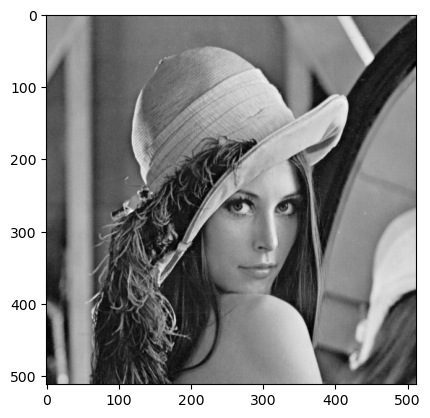

In [ ]:
plt.imshow( lena_gray, cmap='gray' );

<b>HSV</b>

<font color='green'> Рассмотрим еще формат HSV - Hue Saturation Value (оттенок цвета, его насыщенность, его значение) </font>

In [ ]:
strip = np.empty( (32, 256), dtype='uint8')
strip.shape, strip.dtype

((32, 256), dtype('uint8'))

In [ ]:
hsv = [strip.copy(), strip.copy(), strip.copy()]

<font color='green'> Заполним для примера какими-нибудь значениями: </font>

In [ ]:
hsv[1][:,:] = 100
hsv[2][:,:] = 100

In [ ]:
for _ in range(256):
    hsv[0][:,_]=_

In [ ]:
hsv_img = cv.merge( hsv )

In [ ]:
hsv_rgb = cv.cvtColor( hsv_img, cv.COLOR_HSV2RGB)
#lena_gray.shape, lena_gray.dtype

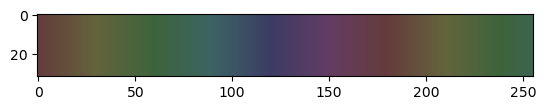

In [ ]:
plt.imshow( hsv_rgb );

<font color='green'> Видим все цвета радуги за счет изменения всего одной компоненты (в RGB так сделать нельзя). </font>

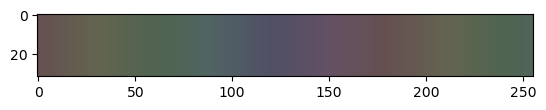

In [ ]:
hsv[1][:,:] = 50
hsv_img = cv.merge( hsv )
hsv_rgb = cv.cvtColor( hsv_img, cv.COLOR_HSV2RGB)
plt.imshow( hsv_rgb );

<font color='green'> За счет изменение второй компоненты можем менять яркость изображения.</font>

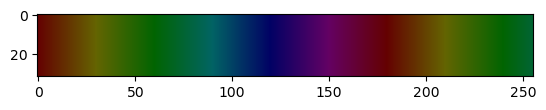

In [ ]:
hsv[1][:,:] = 250
hsv_img = cv.merge( hsv )
hsv_rgb = cv.cvtColor( hsv_img, cv.COLOR_HSV2RGB)
plt.imshow( hsv_rgb );

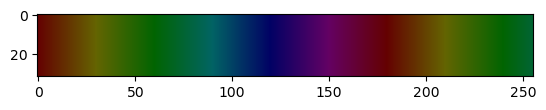

In [ ]:
hsv[1][:,:] = 250
hsv_img = cv.merge( hsv )
hsv_rgb = cv.cvtColor( hsv_img, cv.COLOR_HSV2RGB)
plt.imshow( hsv_rgb );

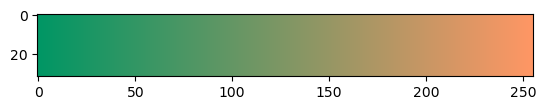

In [ ]:
hsv[1][:,:] = 150
hsv[2][:,:] = 100
plt.imshow( cv.merge( hsv ) );

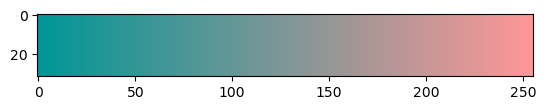

In [ ]:
hsv[2][:,:] = 150
plt.imshow( cv.merge( hsv ) );

<b>YUV</b>

<font color='green'> Еще один формат YUV. Главная идея - применение функции порога. Предполагается, что после ее применения главное куски картинки останутся, а все ненужное уберется. </font>

In [ ]:
peppers = cv.imread('./peppers.jpg')

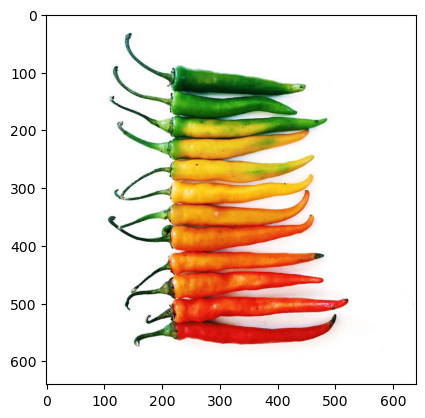

In [ ]:
plt.imshow( peppers[:,:,::-1] );

In [ ]:
#peppers = peppers.astype(np.float32)

In [ ]:
peppers.dtype, peppers.shape

(dtype('uint8'), (640, 640, 3))

In [ ]:
np.max(peppers)

255

In [ ]:
#peppers_yuv = cv.cvtColor( peppers, cv.COLOR_BGR2HSV) #_FULL
peppers_yuv = cv.cvtColor( peppers, cv.COLOR_BGR2YUV) #_FULL
peppers_yuv.shape, peppers_yuv.dtype# YCrCb

((640, 640, 3), dtype('uint8'))

In [ ]:
hue, sat, val = cv.split( peppers_yuv )

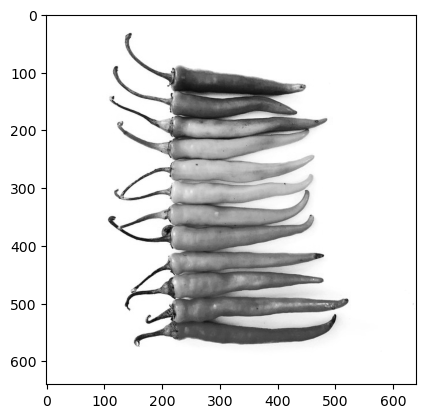

In [ ]:
plt.imshow( hue, cmap='gray')

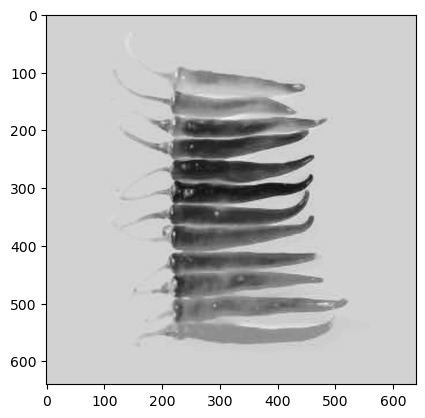

In [ ]:
plt.imshow( sat, cmap='gray')

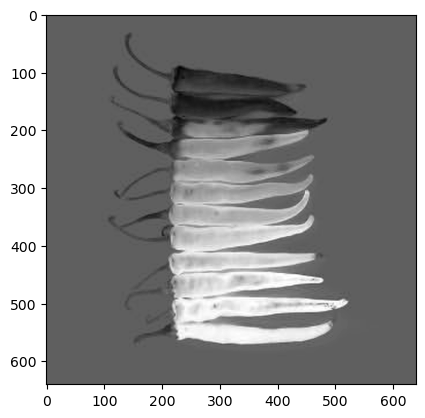

In [ ]:
plt.imshow( val, cmap='gray')

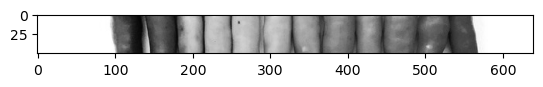

In [ ]:
plt.imshow( hue[:,250:300].T, cmap='gray')

<font color='green'> Вдоль каждой компоненты может посмотреть график и попытаться подобрать порог. </font>

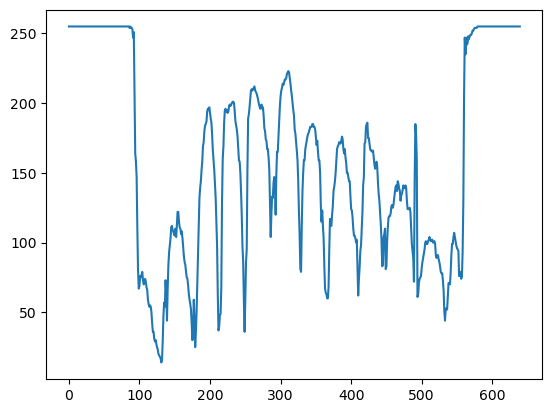

In [ ]:
plt.plot( hue[:, 245] )

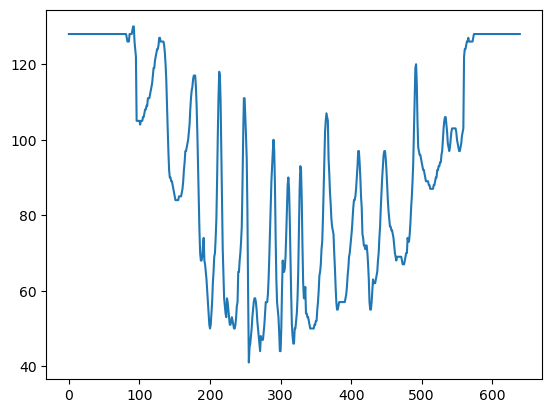

In [ ]:
plt.plot( sat[:, 245] )

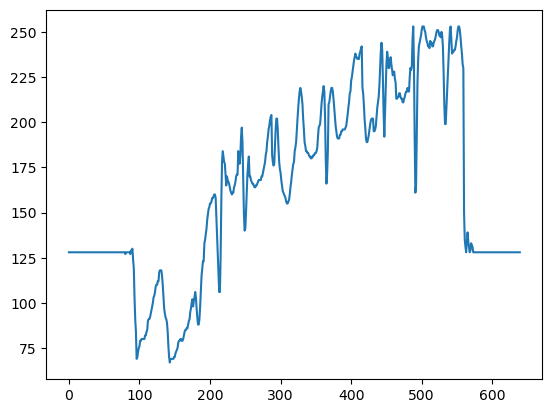

In [ ]:
plt.plot( val[:, 245] )

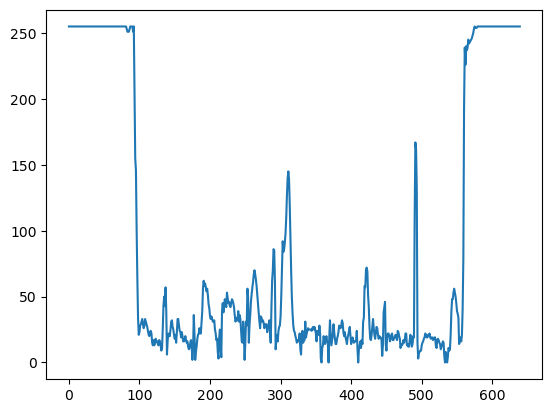

In [ ]:
plt.plot( peppers[:,:,0][:, 245] )

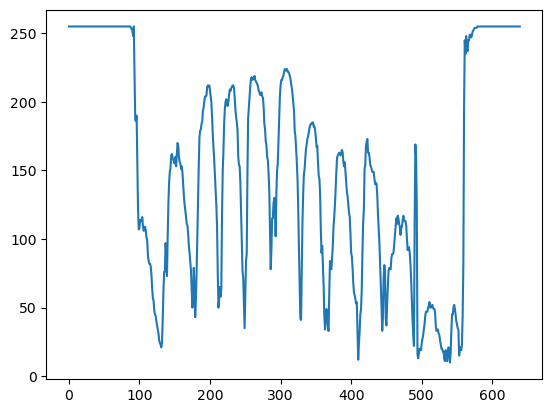

In [ ]:
plt.plot( peppers[:,:,1][:, 245] )

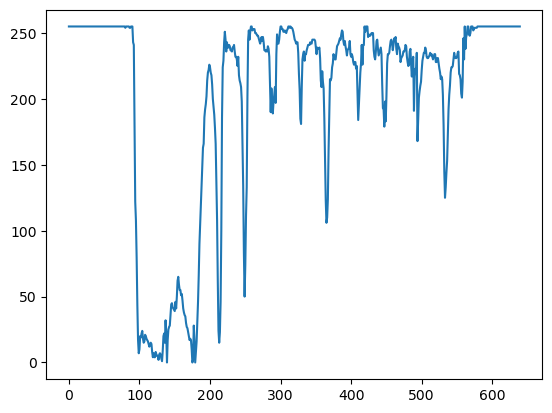

In [ ]:
plt.plot( peppers[:,:,2][:, 245] )

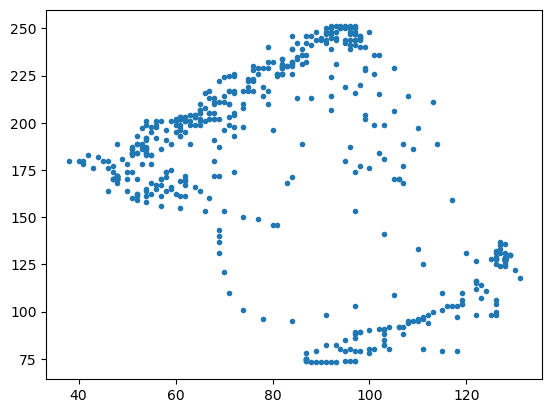

In [ ]:
plt.plot( sat[:, 255], val[:, 255], '.' )

In [ ]:
fruits = cv.imread('./fruits.jpg')
fruits_hsv = cv.cvtColor( fruits, cv.COLOR_BGR2YUV)
fruits_hsv.shape, fruits_hsv.dtype#YUV

((640, 640, 3), dtype('uint8'))

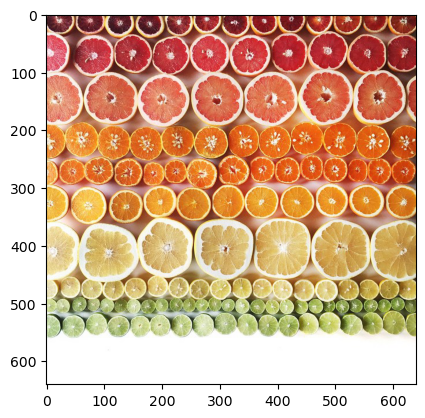

In [ ]:
plt.imshow( fruits[:,:,::-1] );

In [ ]:
hue, sat, val = cv.split( fruits_hsv )

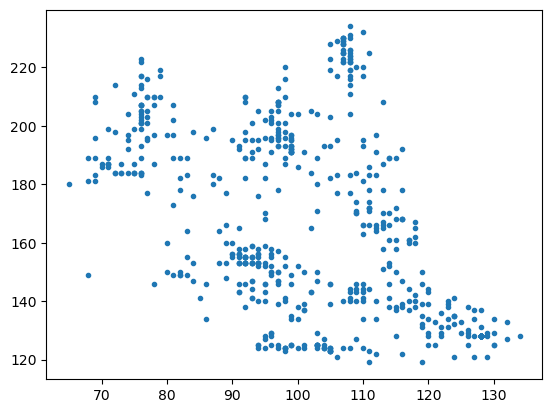

In [ ]:
plt.plot( sat[:, 300], val[:, 300], '.' )

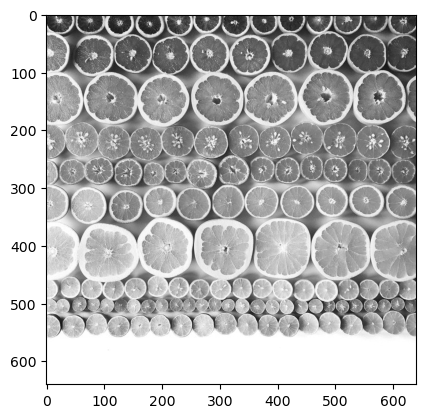

In [ ]:
plt.imshow( hue, cmap='gray')

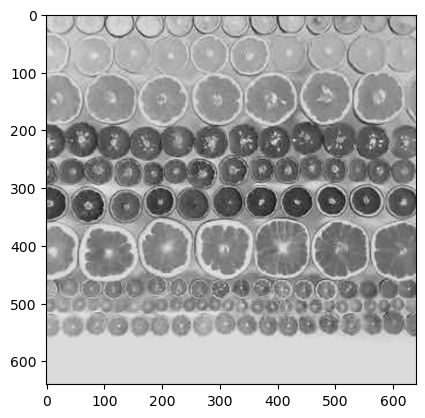

In [ ]:
plt.imshow( sat, cmap='gray')

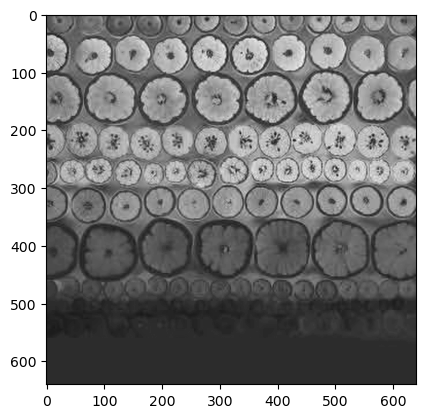

In [ ]:
plt.imshow( val, cmap='gray')

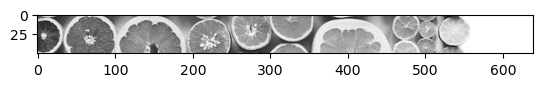

In [ ]:
plt.imshow( hue[:,250:300].T, cmap='gray')

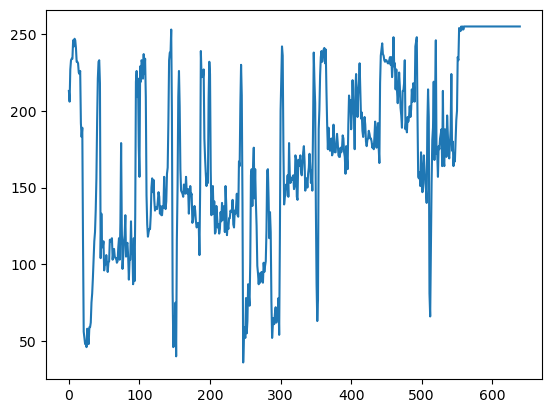

In [ ]:
plt.plot( hue[:, 300] )

<b>Математические операции</b>

In [ ]:
cv.destroyAllWindows()

<b>Арифметика</b>

<font color='green'> При выполнение арифметических операций важно помнить про порог.</font>

In [ ]:
img = lena.copy()+0
img.shape, img.dtype

((512, 512, 3), dtype('uint8'))

In [ ]:
img=img[::2,::2,:]
img.shape

(256, 256, 3)

In [ ]:
while True:
    cv.imshow( "Window3", img )
    k = cv.waitKey(10)
    if k == 83:
        img = img + 10
        #print(np.min(img), np.max(img))
    elif k == 81:
        img -= 10
        #print(np.min(img), np.max(img))
    elif k == 113:
        break
cv.destroyWindow("Window3")

In [ ]:
a = np.array([250, 5], dtype='uint8')

In [ ]:
a + 10

array([ 4, 15], dtype=uint8)

<font color='green'> Numpy автоматически считает как бы по модулю порога, т.е при превышении порога из значения вычитает сам порог.</font>

In [ ]:
cv.add(a, 10)

array([[255],
       [ 15]], dtype=uint8)

<font color='green'> Чтобы таких проблем не было, можно использовать функцию add из opencv - она делает именно clipping, т.е обрезает слишком большие значения до порога.</font>

In [ ]:
img.shape, img.dtype

((256, 256, 3), dtype('uint8'))

In [ ]:
np.max(img)

255

In [ ]:
#img = lena.copy()+0
while True:
    cv.imshow( "Window4", img )
    k = cv.waitKey(100)
    if k == 100:
        img = cv.add(img, 10)
    elif k == 97:
        img = cv.subtract(img, 10)
        print(np.max(img))
    elif k == 113:
        break
cv.destroyWindow("Window4")

In [ ]:
np.max(img)

255

In [ ]:
np.max( cv.subtract(img, (100,100,100,0) ) )

155

In [ ]:
img1 = cv.add(img, 100 )
img2 = cv.add(img, (100, 100, 100, 0) )

In [ ]:
img1[0,0]

array([225, 137, 226], dtype=uint8)

In [ ]:
img2[0,0]

array([225, 237, 255], dtype=uint8)

In [ ]:
img = lena.copy()+0.0
img.shape, img.dtype

((512, 512, 3), dtype('float64'))

In [ ]:
while True:
    cv.imshow( "Window2", img/255 )
    k = cv.waitKey(100)
    if k == 83:
        img *= 1.1
        print(np.min(img), np.max(img))
    elif k == 81:
        img /= 1.1
        print(np.min(img), np.max(img))
    elif k == 113:
        break
cv.destroyWindow("Window2")

<h2>Отрисовка объектов</h2>

<h3>Окружности</h3>

<font color='green'> Будем рисовать фигуры на картинке. Сначала нам надо создать картинку.</font>

In [ ]:
img = np.zeros( (500, 500, 3))
img.dtype

dtype('float64')

In [ ]:
cv.circle( img, (200, 200), 50, (0, 1, 0) );#255

<font color='green'> Первый аргумент - где рисуем, второй - координаты центра окружности, третий - радиус, четвертый - цвет (кортеж (R, G, B) )</font>

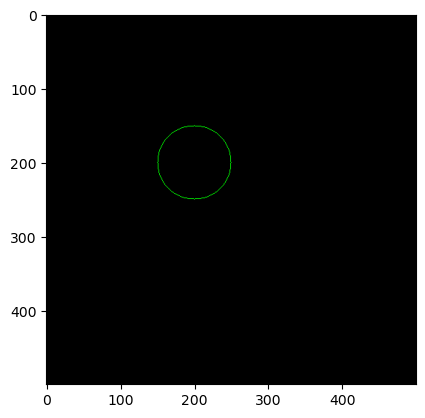

In [ ]:
plt.imshow( img )

<font color='green'> Еще один параметр thickness - толщина линии, отрицательное значение этого параметра разрешает сделать заливку фигуры.</font>

In [ ]:
cv.circle( img, (100, 100), 50, (0, 0, 1), thickness=3 );#255

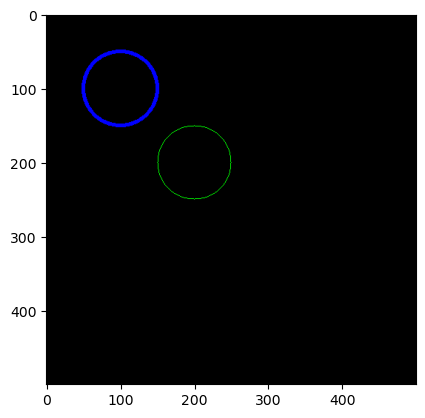

In [ ]:
plt.imshow( img )

In [ ]:
cv.circle( img, (150, 100), 40, (1, 0, 1), thickness=-1 );#255

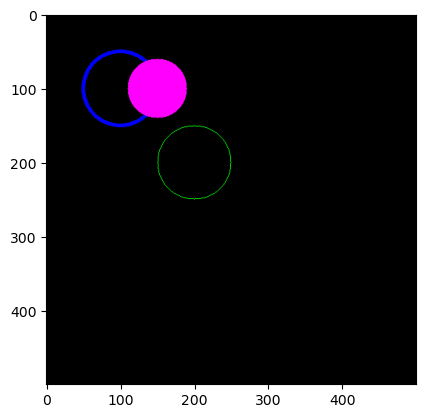

In [ ]:
plt.imshow( img )

In [ ]:
#cv.rectangle?

<font color='green'> Отрисовка прямоугольника делается почти так же с использованием соответствующей функции. </font>

In [ ]:
cv.rectangle( img, (300, 250), (400, 300), (1, 0, 0) );

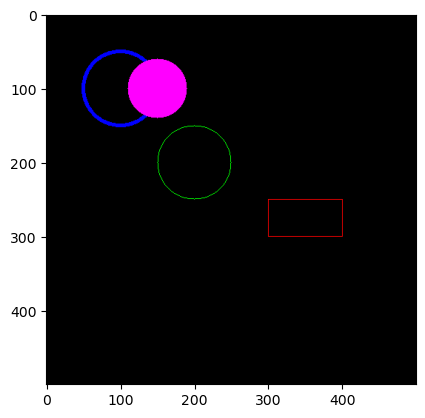

In [ ]:
plt.imshow( img )

In [ ]:
def draw_circle(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, y)
        cv.circle( param, (x, y), 50, (0, 255, 0) );
        cv.imshow( "Window", img/255 )

<font color='green'> Для обработки мышки мы используем функцию setMouseCallBack в соответствующем окне, и теперь можем при нажатии ЛКМ рисовать окружность в соответствующем месте интерактивного окна. </font>

In [ ]:
cv.imshow( "Window", img/255 )
cv.setMouseCallback("Window", draw_circle, img)
print(cv.waitKey(0))
cv.destroyWindow("Window")

445 376
113
